In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
DATASET = 'mnist'
# DATASET = 'wine_quality'
dataset_to_str = {'mnist': 'MNIST', 'wine_quality': 'Wine Quality'}
DATASET_STR = dataset_to_str[DATASET]

DIM_RED_METHODS = ['ICA', 'PCA']

# METHOD = 'GMM'
METHOD = 'KMeans'

# metric = 'aic'
metric = 'inertia'

metric_str = metric.replace('_', ' ').title()
metric_str = metric_str.replace('Aic', 'AIC')
metric_str = metric_str.replace('Bic', 'BIC')

dfs = {}
for dim_red_method in DIM_RED_METHODS:
    df = pd.read_csv(f'results/step_3/{DATASET}/{METHOD}_{dim_red_method}_metrics.csv')
    df.sort_values(by='num_components', inplace=True)
    dfs[dim_red_method] = df

In [4]:
COLORS = {dataset: color for dataset, color in zip(DIM_RED_METHODS, ['blue', 'red'])}

ICA
PCA


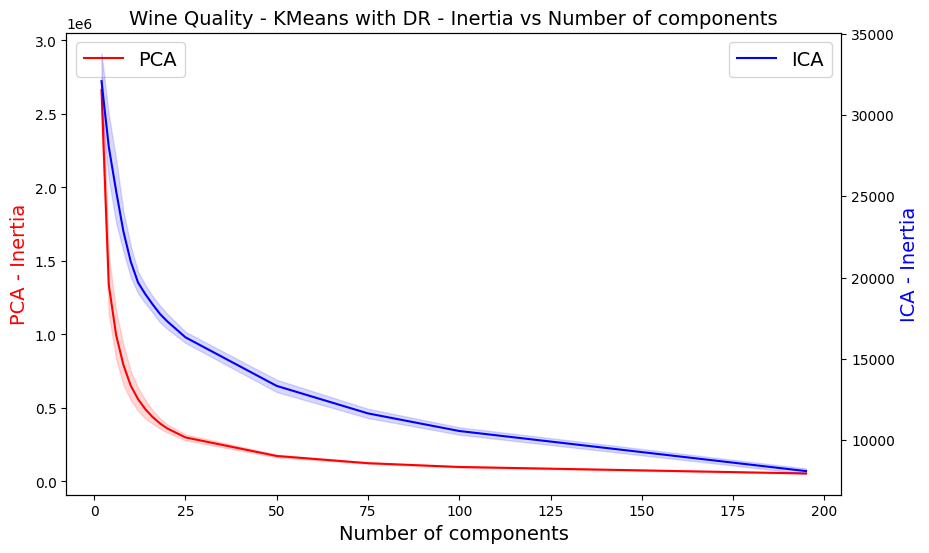

In [10]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

for (dim_red_method, df), ax in zip(dfs.items(), [ax2, ax1]):
    print(dim_red_method)
    X = np.array(df['num_components'])
    y = np.array(df[f'{metric}_mean'])
    error = np.array(df[f'{metric}_std'])

    ax.plot(X, y, label=dim_red_method, color=COLORS[dim_red_method])
    N = 3
    ax.fill_between(
        X, 
        y-error*N, 
        y+error*N, 
        alpha=0.15,
        color=COLORS[dim_red_method])

fontsize = 14
ax1.set_xlabel('Number of components', fontsize=fontsize)
ax2.set_ylabel(f"{DIM_RED_METHODS[0]} - {metric_str}", color=COLORS[DIM_RED_METHODS[0]], fontsize=fontsize)
ax1.set_ylabel(f"{DIM_RED_METHODS[1]} - {metric_str}", color=COLORS[DIM_RED_METHODS[1]], fontsize=fontsize)
plt.title(f'{DATASET_STR} - {METHOD} with DR - {metric_str} vs Number of components', fontsize=fontsize)
ax1.legend(loc='upper left', fontsize=fontsize)
ax2.legend(loc='upper right', fontsize=fontsize)
# plt.savefig(f'figures/{METHOD}_{metric}.png')